In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df = pd.read_csv("../data/gold_prices.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [3]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2019-01-02,1281.000000,1286.000000,1277.599976,1286.000000,149
2019-01-03,1291.800049,1292.000000,1286.699951,1286.800049,10
2019-01-04,1282.699951,1294.199951,1275.300049,1294.199951,34
2019-01-07,1286.800049,1286.800049,1286.599976,1286.800049,2
2019-01-08,1283.199951,1283.199951,1278.199951,1280.500000,54
...,...,...,...,...,...
2025-09-24,3732.100098,3772.500000,3732.100098,3769.800049,588
2025-09-25,3736.899902,3756.000000,3724.699951,3742.800049,1899
2025-09-26,3775.300049,3775.300049,3775.300049,3775.300049,19308


## CLS

In [4]:
class TrendAnalyzer:
    """
    Analyze the trend of a price column in a DataFrame.
    """
    def __init__(self, data, base_col):
        self.data = data.copy()
        self.base_col = base_col
        self.data['pct_change'] = self.data[base_col].pct_change() * 100

    def des_trend(self):
        percentiles = [0, 25, 50, 75, 90, 95, 99, 99.5, 99.9, 100]
        values = np.percentile(self.data['pct_change'].dropna(), percentiles)
        percentiles_df = pd.DataFrame({'Percentile': percentiles, 'Value': values}).set_index('Percentile')
        print(percentiles_df)

    def plot_trend_dist(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data['pct_change'].dropna(), bins=50, kde=True)
        plt.title(f'Distribution of Daily Percentage Change in {self.base_col} Prices')
        plt.xlabel('Percentage Change (%)')
        plt.ylabel('Frequency')
        plt.show()

    def plot_trend_over_time(self):
        plt.figure(figsize=(20, 6))
        plt.plot(self.data.index, self.data['pct_change'])
        plt.title(f'Daily Percentage Change in {self.base_col} Prices Over Time')
        plt.xlabel('Date')
        plt.ylabel('Percentage Change (%)')
        plt.show()

class DiffAnalyzer:
    """
    Analyze the percentage difference between two price columns in a DataFrame.
    """
    def __init__(self, data, base_col, ref_col):
        self.data = data.copy()
        self.base_col = base_col
        self.ref_col = ref_col
        self.data['diff'] = (self.data[base_col] - self.data[ref_col]) / self.data[base_col] * 100

    def des_diff(self):
        percentiles = [0, 25, 50, 75, 90, 95, 99, 99.5, 99.9, 100]
        values = np.percentile(self.data['diff'], percentiles)
        percentiles_df = pd.DataFrame({'Percentile': percentiles, 'Value': values}).set_index('Percentile')
        print(percentiles_df)

    def plot_diff_dist(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data['diff'], bins=50, kde=True)
        plt.title(f'Distribution of Percentage Difference between {self.base_col} and {self.ref_col} Prices')
        plt.xlabel('Percentage Difference (%)')
        plt.ylabel('Frequency')
        plt.show()

    def plot_diff_trend(self):
        plt.figure(figsize=(20, 6))
        plt.plot(self.data.index, self.data['diff'])
        plt.title(f'Percentage Difference between {self.base_col} and {self.ref_col} Prices Over Time')
        plt.xlabel('Date')
        plt.ylabel('Percentage Difference (%)')
        plt.show()


class ConDropAnalyzer:
    """
    Analyze the consecutive percentage drop in a price column of a DataFrame.
    """
    def __init__(self, data, base_col):
        self.data = data.copy()
        self.base_col = base_col
        self.data['ConDrop'] = ConDropAnalyzer.con_drop_pct(self.data[self.base_col])
    
    @staticmethod
    def con_drop_pct(series):
        """
        Calculate the consecutive percentage drop from the price at the start of the drop streak.
        If price keeps dropping, use the price from when the drop started.
        """
        drops = []
        streak_start = series.iloc[0]
        prev = series.iloc[0]
        dropping = False
        for curr in series.iloc[1:]:
            if curr < prev:
                if not dropping:
                    streak_start = prev
                    dropping = True
                drop_pct = (streak_start - curr) / streak_start * 100
            else:
                drop_pct = 0
                dropping = False
            drops.append(drop_pct)
            prev = curr
        return [0] + drops

    def des_diff(self):
        percentiles = [0, 25, 50, 75, 90, 95, 99, 99.5, 99.9, 100]
        values = np.percentile(self.data['ConDrop'], percentiles)
        percentiles_df = pd.DataFrame({'Percentile': percentiles, 'Value': values}).set_index('Percentile')
        print(percentiles_df)

    def plot_diff_dist(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data['ConDrop'], bins=50, kde=True)
        plt.title(f'Distribution of Consecutive Percentage Drop in {self.base_col} Prices')
        plt.xlabel('Percentage Difference (%)')
        plt.ylabel('Frequency')
        plt.show()

    def plot_diff_trend(self):
        plt.figure(figsize=(20, 6))
        plt.plot(self.data.index, self.data['ConDrop'])
        plt.title(f'Consecutive Percentage Drop in {self.base_col} Prices Over Time')
        plt.xlabel('Date')
        plt.ylabel('Percentage Difference (%)')
        plt.show()

## Explore

### Close Trend

               Value
Percentile          
0.0        -4.978726
25.0       -0.416251
50.0        0.087993
75.0        0.623710
90.0        1.208775
95.0        1.615440
99.0        2.669445
99.5        3.067248
99.9        4.659123
100.0       5.947668


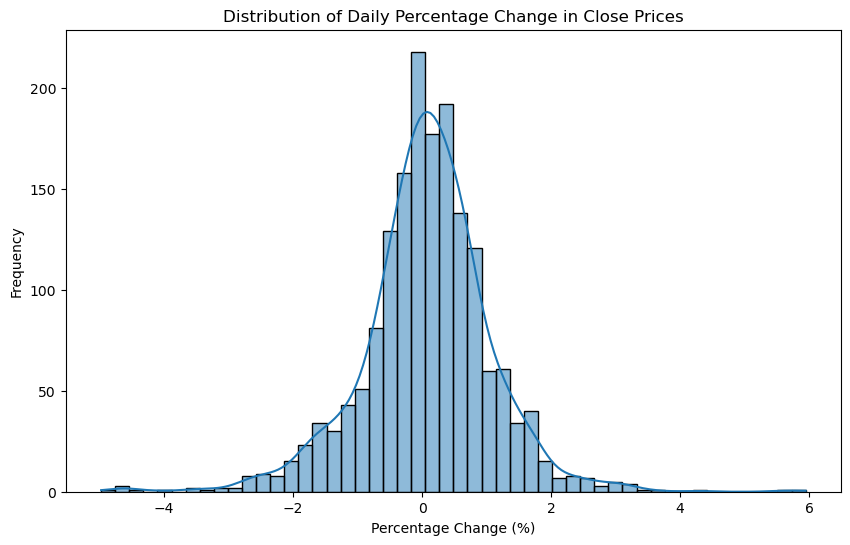

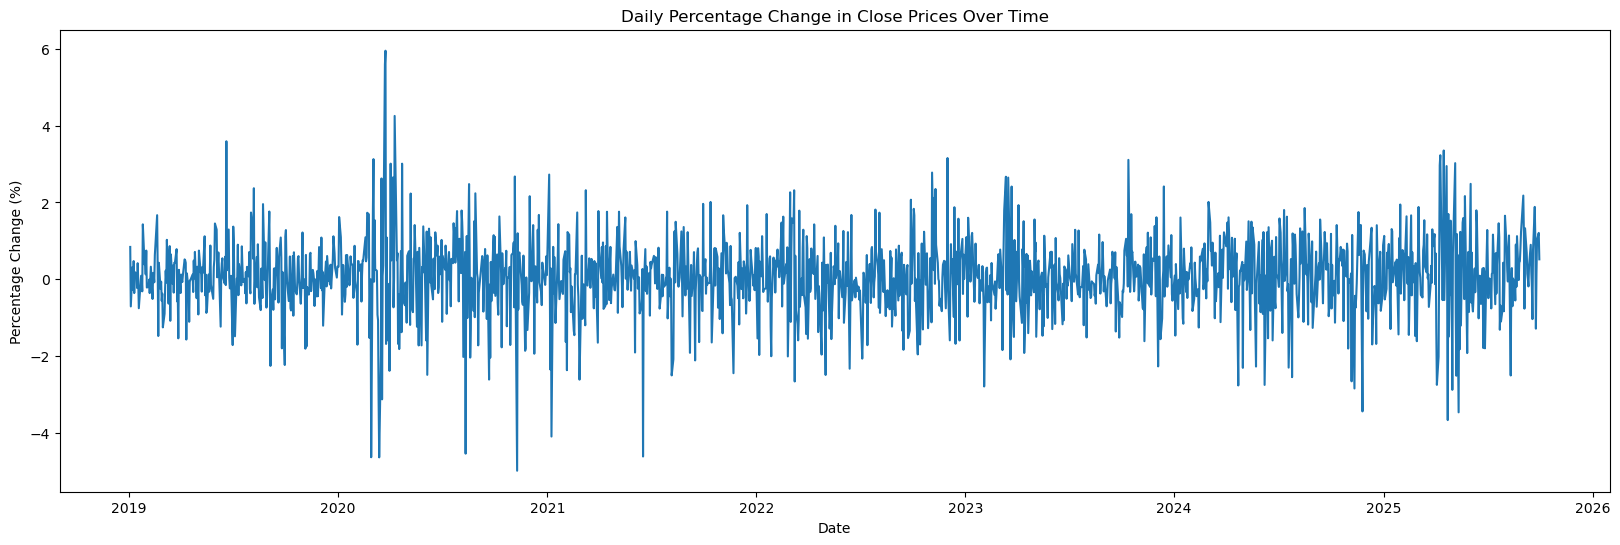

In [5]:
c_trend = TrendAnalyzer(df, base_col='Close')
c_trend.des_trend()
c_trend.plot_trend_dist()
c_trend.plot_trend_over_time()

### Open-Close

               Value
Percentile          
0.0        -4.420521
25.0       -0.486398
50.0        0.000000
75.0        0.344884
90.0        0.962768
95.0        1.405895
99.0        2.444982
99.5        3.153158
99.9        4.824493
100.0       5.302400


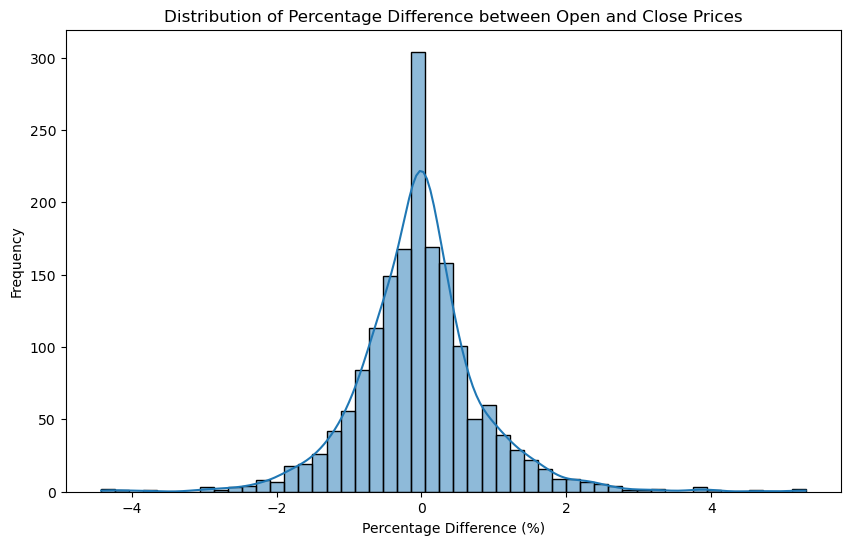

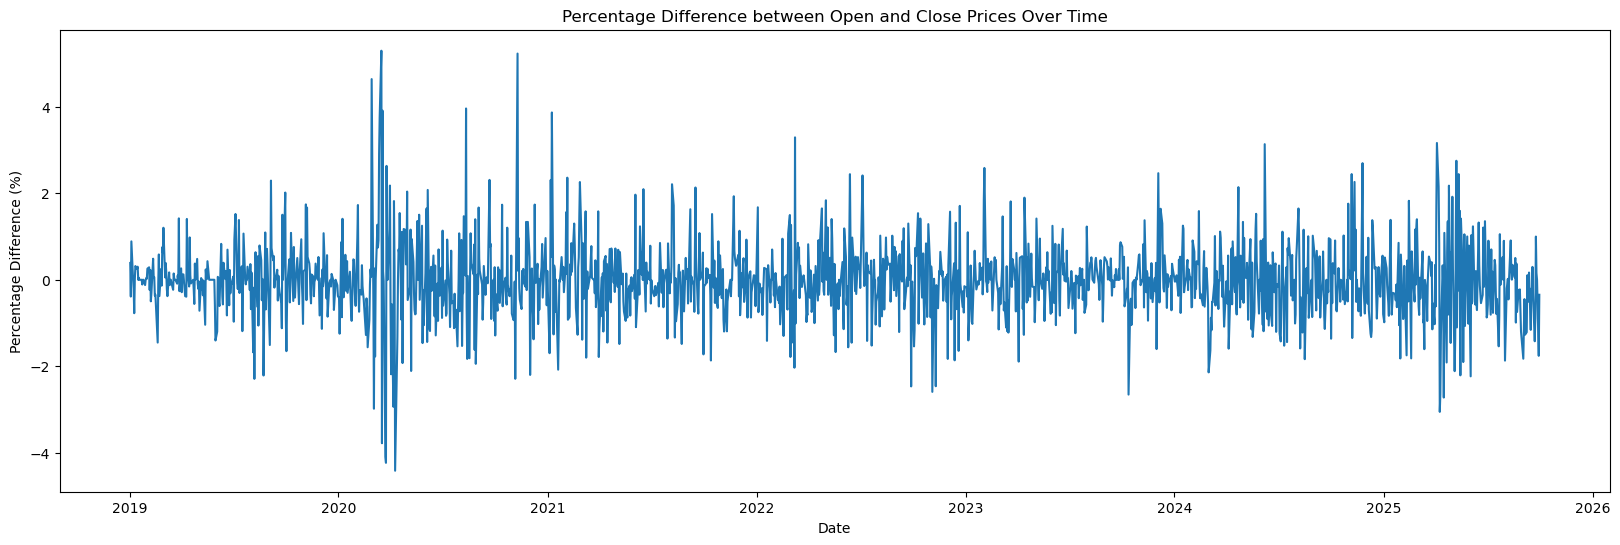

In [6]:
oc = DiffAnalyzer(df, 'Open', 'Close')
oc.des_diff()
oc.plot_diff_dist()
oc.plot_diff_trend()

### High-Low

               Value
Percentile          
0.0         0.000000
25.0        0.478229
50.0        0.826686
75.0        1.305989
90.0        1.878763
95.0        2.368796
99.0        3.873934
99.5        4.615580
99.9        5.664108
100.0       7.456504


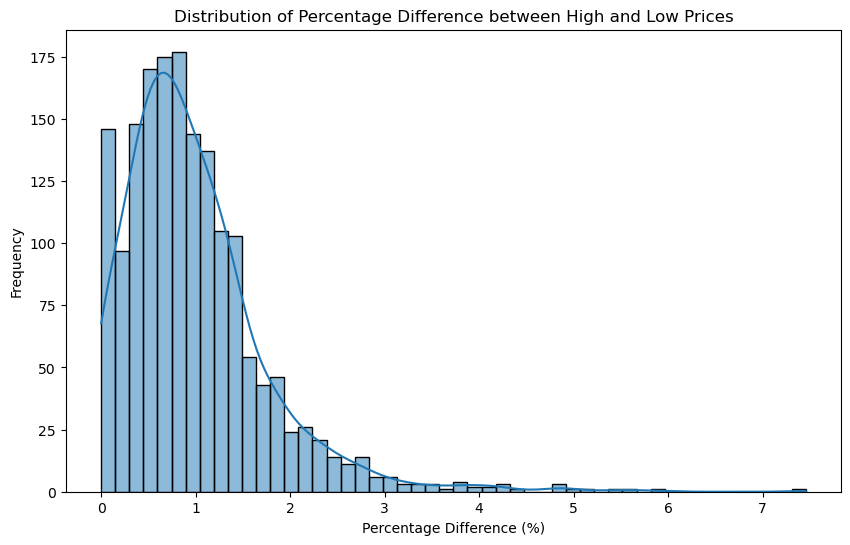

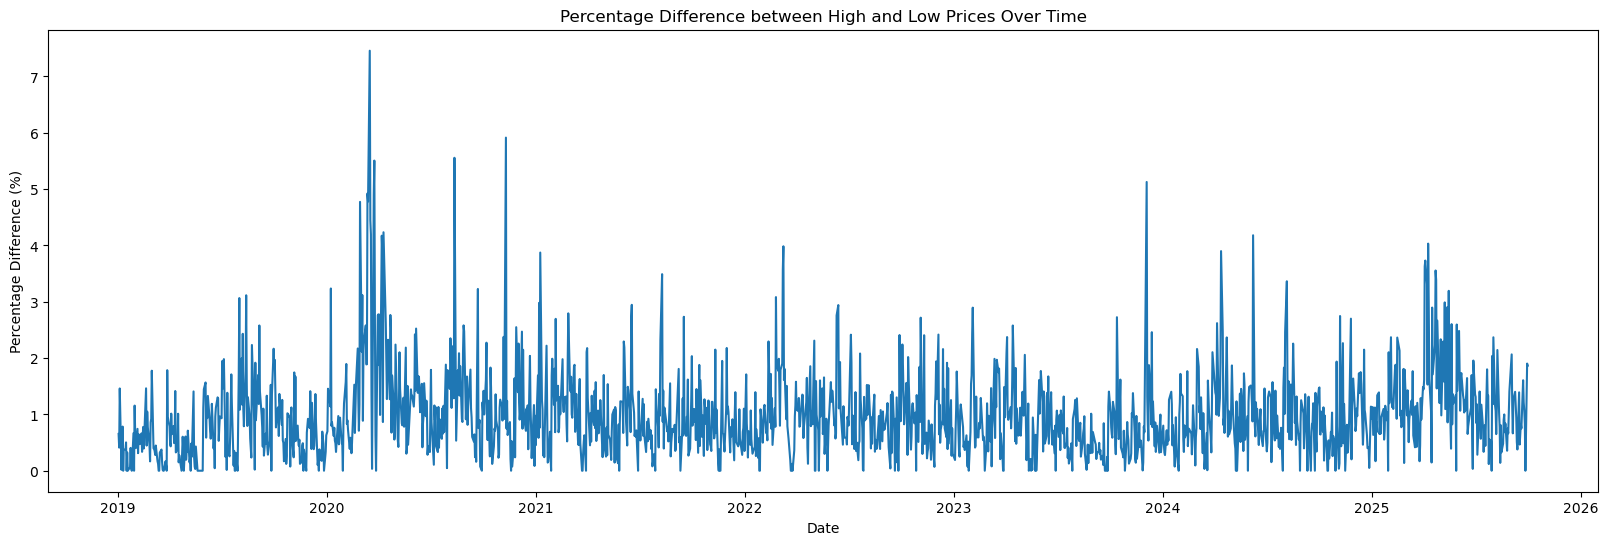

In [7]:
hl = DiffAnalyzer(df, 'High', 'Low')
hl.des_diff()
hl.plot_diff_dist()
hl.plot_diff_trend()

### Open-Low

               Value
Percentile          
0.0         0.000000
25.0        0.015533
50.0        0.252326
75.0        0.659335
90.0        1.304290
95.0        1.745601
99.0        2.900619
99.5        3.714004
99.9        5.435558
100.0       7.456504


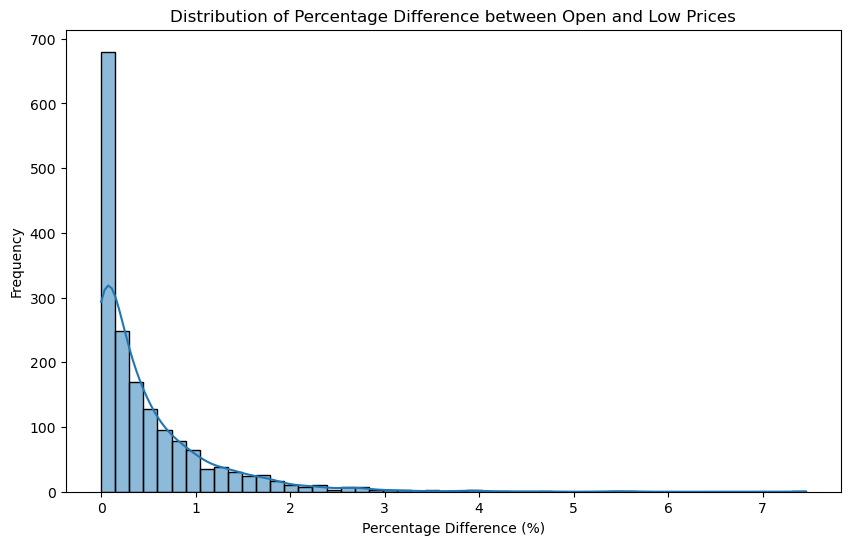

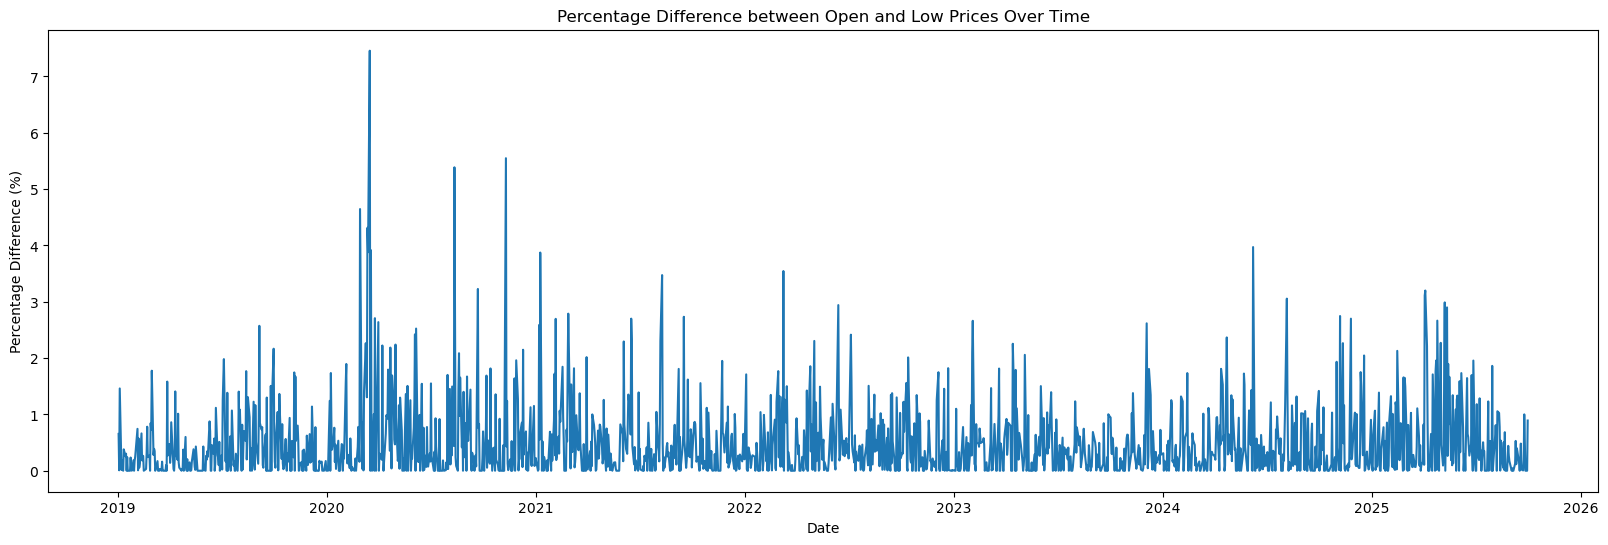

In [8]:
ol = DiffAnalyzer(df, 'Open', 'Low')
ol.des_diff()
ol.plot_diff_dist()
ol.plot_diff_trend()

### Rolling Low

                Value
Percentile           
0.0          0.000000
25.0         0.000000
50.0         0.000000
75.0         0.696421
90.0         1.716439
95.0         2.654928
99.0         4.666245
99.5         5.568473
99.9         7.670762
100.0       12.402726


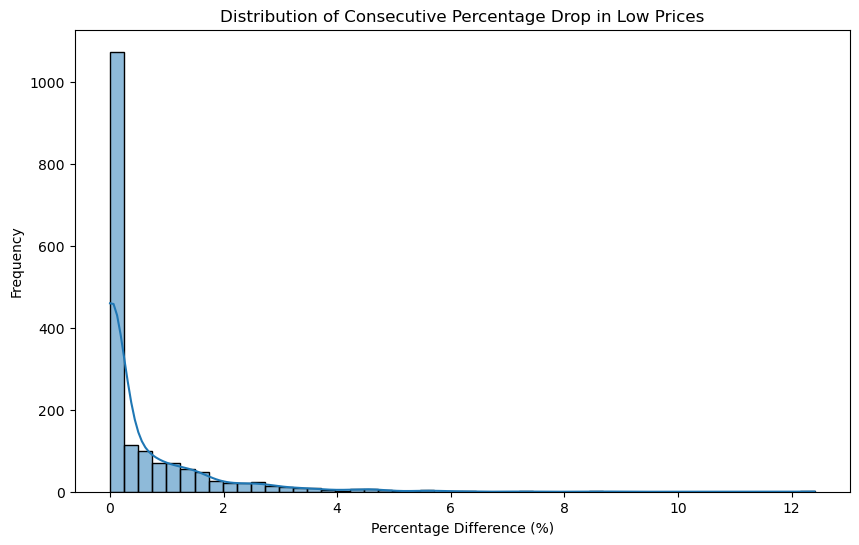

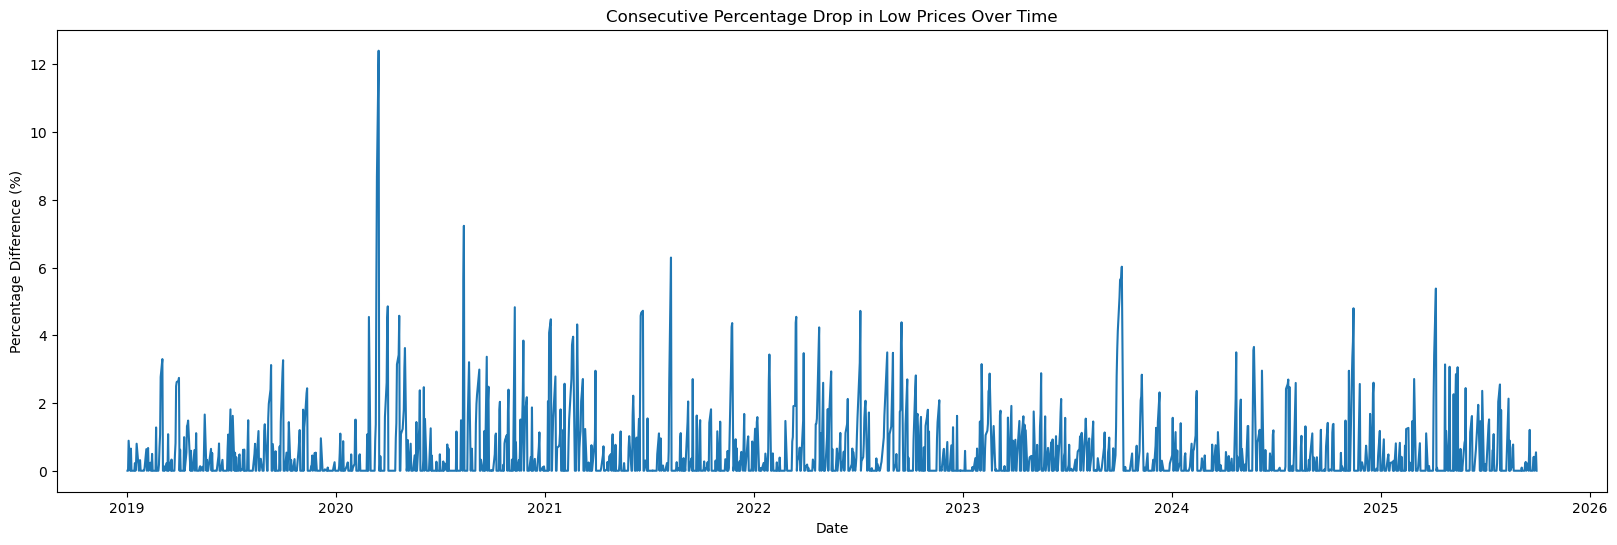

In [9]:
rl = ConDropAnalyzer(df, 'Low')
rl.des_diff()
rl.plot_diff_dist()
rl.plot_diff_trend()